Project: Lending-Club 

# 1. Exploratory Data Analysis 

In [ ]:
# Importing libraries

import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, plot_roc_curve,roc_curve,precision_recall_curve, mean_squared_error
import matplotlib as mpl
from sklearn.tree import export_graphviz
import sklearn as sk
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
data = sorted(glob('/Users/sourabh/Library/CloudStorage/u/Fall 2022/Financial Technology/Lending Club/LoanData/LoanStats*.csv'))
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

In [ ]:
# Combining all the files into a single file by using concat function

combined = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
                      for datafile in data)

/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/1652089399.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  combined = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/1652089399.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  combined = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/1652089399.py:3: DtypeWarning: Columns (19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  combined = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/1652089399.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  combined = pd.concat(pd.re

In [ ]:
pd.options.display.max_rows = 1000
combined.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,sourcefilename
0,75710736,NaN,12800,12800,12800.0,36 months,11.99%,425.09,C,C1,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,/Users/abhinavkulkarni/Library/CloudStorage/On...
1,76143686,NaN,9000,9000,9000.0,36 months,15.31%,313.36,C,C5,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,/Users/abhinavkulkarni/Library/CloudStorage/On...
2,76143234,NaN,8000,8000,8000.0,36 months,10.75%,260.97,B,B4,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,/Users/abhinavkulkarni/Library/CloudStorage/On...
3,76022756,NaN,25000,25000,25000.0,60 months,12.99%,568.70,C,C2,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,/Users/abhinavkulkarni/Library/CloudStorage/On...
4,76143291,NaN,35000,35000,35000.0,60 months,18.25%,893.54,D,D3,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,/Users/abhinavkulkarni/Library/CloudStorage/On...


In [ ]:
# dropping NA values

combined.dropna(axis = 1,inplace = True)
combined.shape

(1763061, 75)

In [ ]:
# Dropping columns which are not useful

combined.drop(['id','url','hardship_flag','debt_settlement_flag','sourcefilename','policy_code','application_type','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pub_rec_bankruptcies','tax_liens'],axis = 1,inplace = True)
combined.shape

(1763061, 50)

In [ ]:
# Checking for the data type

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1763061 entries, 0 to 143018
Data columns (total 50 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   int64  
 1   funded_amnt                 int64  
 2   funded_amnt_inv             float64
 3   term                        object 
 4   int_rate                    object 
 5   installment                 float64
 6   grade                       object 
 7   sub_grade                   object 
 8   home_ownership              object 
 9   annual_inc                  float64
 10  verification_status         object 
 11  issue_d                     object 
 12  loan_status                 object 
 13  pymnt_plan                  object 
 14  purpose                     object 
 15  addr_state                  object 
 16  delinq_2yrs                 int64  
 17  earliest_cr_line            object 
 18  fico_range_low              int64  
 19  fico_range_high       

1) How many loans did lending club issue each month from January 2016 to June 2019? What percentage of loans issued in each of these months defaulted?

In [ ]:
# Checking for issue_d value count

combined.issue_d.value_counts()

Mar-2016    61992
Jul-2019    50536
Aug-2019    47546
May-2018    46311
Oct-2018    46305
Aug-2018    46079
May-2019    45541
Sep-2019    44937
Apr-2019    43954
Jan-2019    43584
Aug-2017    43573
Jul-2018    43089
Apr-2018    42928
Nov-2017    42343
Nov-2018    41973
Jun-2019    41644
Jun-2018    41533
Dec-2018    40134
Sep-2017    39713
Feb-2016    39529
Jul-2017    39415
Sep-2018    39026
Mar-2018    38771
Dec-2017    38154
Oct-2017    38151
Jun-2017    38087
May-2017    37681
Mar-2017    37181
Apr-2016    36432
Jan-2018    36347
Aug-2016    36280
Dec-2016    36183
Mar-2019    36106
Feb-2019    35985
Jul-2016    34696
Nov-2016    34591
Jun-2016    33019
Oct-2016    32772
Feb-2018    32746
Jan-2016    32366
Jan-2017    31835
Apr-2017    29683
May-2016    28403
Sep-2016    28144
Feb-2017    27763
Name: issue_d, dtype: int64

In [ ]:
# Sorting issue_d column by year and month

combined['issue_d_year'] = pd.DatetimeIndex(combined['issue_d']).year
combined['issue_d_month'] = pd.DatetimeIndex(combined['issue_d']).month
combined = combined.sort_values(by = ['issue_d_year', 'issue_d_month'])
display(combined.head())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,10,0,0,3,277748,105716,20500,90253,2016,1
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,6,0,0,1,159779,46885,35500,36030,2016,1
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,10,0,0,3,63851,46225,2300,45551,2016,1
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,8,0,0,0,76492,61418,24500,49956,2016,1
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,5,0,0,4,32300,22946,15800,10000,2016,1


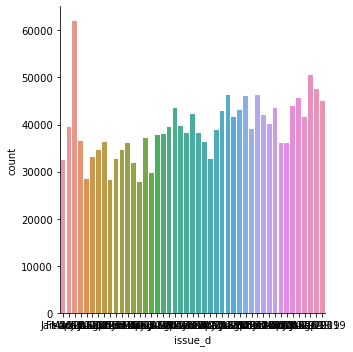

In [ ]:
# Plotting for issue_d

g = sns.catplot(x="issue_d",
                kind="count",
                data=combined)

In [ ]:
#Calculating the default amount

combined['default_amnt'] = ((combined['loan_amnt'] - combined['total_rec_prncp']))
display(combined)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,chargeoff_within_12_mths,delinq_amnt,mort_acc,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,0,0,3,277748,105716,20500,90253,2016,1,18018.96
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,0,0,1,159779,46885,35500,36030,2016,1,0.00
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,0,0,3,63851,46225,2300,45551,2016,1,0.00
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,0,0,0,76492,61418,24500,49956,2016,1,0.00
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,0,0,4,32300,22946,15800,10000,2016,1,15220.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,0,0,0,155416,38615,109300,44416,2019,9,4509.52
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,0,0,0,60200,18950,46200,12500,2019,9,20365.35
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,0,0,0,46900,17233,11300,18000,2019,9,24237.87
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,0,0,0,18600,8918,15300,0,2019,9,9060.14


In [ ]:
# Calculating the default rate

combined['default_rate'] = ((combined['loan_amnt'] - combined['total_rec_prncp'])/ combined['loan_amnt'])*100
display(combined)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,delinq_amnt,mort_acc,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,0,3,277748,105716,20500,90253,2016,1,18018.96,75.079000
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,0,1,159779,46885,35500,36030,2016,1,0.00,0.000000
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,0,3,63851,46225,2300,45551,2016,1,0.00,0.000000
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,0,0,76492,61418,24500,49956,2016,1,0.00,0.000000
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,0,4,32300,22946,15800,10000,2016,1,15220.38,76.101900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,0,0,155416,38615,109300,44416,2019,9,4509.52,90.190400
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,0,0,60200,18950,46200,12500,2019,9,20365.35,92.569773
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,0,0,46900,17233,11300,18000,2019,9,24237.87,92.865402
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,0,0,18600,8918,15300,0,2019,9,9060.14,90.601400


In [ ]:
# Sorting the values and grouping them by mean

combined = combined.sort_values(by = ['issue_d_year', 'issue_d_month'])
combined.groupby('issue_d')['default_rate'].mean()

issue_d
Apr-2016    15.468489
Apr-2017    26.364914
Apr-2018    52.720719
Apr-2019    87.781205
Aug-2016    17.201401
Aug-2017    33.233046
Aug-2018    63.420287
Aug-2019    87.730719
Dec-2016    20.161664
Dec-2017    42.548232
Dec-2018    75.146275
Feb-2016    15.509974
Feb-2017    23.084397
Feb-2018    47.096740
Feb-2019    81.678241
Jan-2016    15.336799
Jan-2017    20.974506
Jan-2018    44.193649
Jan-2019    78.109567
Jul-2016    17.396801
Jul-2017    31.850000
Jul-2018    60.523082
Jul-2019    84.620768
Jun-2016    15.835564
Jun-2017    29.974340
Jun-2018    57.947833
Jun-2019    93.619086
Mar-2016    16.085637
Mar-2017    24.196384
Mar-2018    49.547152
Mar-2019    84.640461
May-2016    15.919089
May-2017    28.194088
May-2018    55.282687
May-2019    90.770069
Nov-2016    19.050895
Nov-2017    39.904088
Nov-2018    72.473085
Oct-2016    17.286370
Oct-2017    38.002122
Oct-2018    69.654289
Sep-2016    17.315778
Sep-2017    37.338071
Sep-2018    66.830067
Sep-2019    90.858654
Na

2) Utilizing the `purpose' eld to represent each loan category, what are the top  ve loan categories during 2016, 2017, and 2018? Expand on your work in the prior question by computing the default rate for each of these loan categories for each year. Interpret your results; which loan categories are most and least risky? How has this risk changed over time?

In [ ]:
# Calculating the top five loan categories during 2016, 2017, and 2018

count_df = combined.groupby(['issue_d_year','purpose'])[['loan_amnt']].sum()
count_df.reset_index(inplace=True)
count_df_2016 = count_df.loc[count_df['issue_d_year'] == 2016].nlargest(5, ['loan_amnt'])
count_df_2017 = count_df.loc[count_df['issue_d_year'] == 2017].nlargest(5, ['loan_amnt'])
count_df_2018 = count_df.loc[count_df['issue_d_year'] == 2018].nlargest(5, ['loan_amnt'])
display(count_df_2016.append(count_df_2017).append(count_df_2018))

/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/2969190239.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(count_df_2016.append(count_df_2017).append(count_df_2018))
/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/2969190239.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(count_df_2016.append(count_df_2017).append(count_df_2018))


,issue_d_year,purpose,loan_amnt
2,2016,debt_consolidation,3904078975
1,2016,credit_card,1393891775
3,2016,home_improvement,444422475
8,2016,other,283765425
5,2016,major_purchase,125382875
15,2017,debt_consolidation,3926847225
14,2017,credit_card,1364811275
17,2017,home_improvement,506094600
22,2017,other,338286475
19,2017,major_purchase,144659725


In [ ]:
# Calculating the Default rate for each of these loan categories for each year

default_mean = combined.groupby(['issue_d_year','purpose'])[['default_rate']].mean()
default_mean.reset_index(inplace=True)
display(default_mean)

,issue_d_year,purpose,default_rate
0,2016,car,11.774166
1,2016,credit_card,15.066617
2,2016,debt_consolidation,18.080109
3,2016,home_improvement,15.070560
4,2016,house,18.708642
5,2016,major_purchase,15.155189
6,2016,medical,16.298049
7,2016,moving,15.940027
8,2016,other,14.877904
9,2016,renewable_energy,17.210206


In [ ]:
# Most Risky Loan Category

default_mean = combined.groupby(['issue_d_year','purpose'])[['default_rate']].mean()
default_mean.reset_index(inplace=True)
default_mean_2016 = default_mean.loc[count_df['issue_d_year'] == 2016].nlargest(3, ['default_rate'])
default_mean_2017 = default_mean.loc[count_df['issue_d_year'] == 2017].nlargest(3, ['default_rate'])
default_mean_2018 = default_mean.loc[count_df['issue_d_year'] == 2018].nlargest(3, ['default_rate'])
display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))

/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/326846338.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))
/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/326846338.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))


,issue_d_year,purpose,default_rate
10,2016,small_business,21.385645
4,2016,house,18.708642
2,2016,debt_consolidation,18.080109
26,2017,wedding,65.042235
24,2017,small_business,36.977605
18,2017,house,33.634386
37,2018,small_business,61.762553
28,2018,credit_card,61.085802
29,2018,debt_consolidation,61.048371


In [ ]:
# Least Risky Loan Category

default_mean = combined.groupby(['issue_d_year','purpose'])[['default_rate']].mean()
default_mean.reset_index(inplace=True)
default_mean_2016 = default_mean.loc[count_df['issue_d_year'] == 2016].nsmallest(5, ['default_rate'])
default_mean_2017 = default_mean.loc[count_df['issue_d_year'] == 2017].nsmallest(5, ['default_rate'])
default_mean_2018 = default_mean.loc[count_df['issue_d_year'] == 2018].nsmallest(5, ['default_rate'])
display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))

/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/2141476923.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))
/var/folders/9d/h5j86rz50cqf8_nb92krdw180000gn/T/ipykernel_11984/2141476923.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))


,issue_d_year,purpose,default_rate
12,2016,wedding,3.249542
0,2016,car,11.774166
11,2016,vacation,12.802963
8,2016,other,14.877904
1,2016,credit_card,15.066617
16,2017,educational,0.000000
25,2017,vacation,25.574465
13,2017,car,27.031205
17,2017,home_improvement,30.339009
20,2017,medical,30.514083


3) Extend the linear regression based default model we developed in class using FICO score as an independent variable by considering other variables available in our loan dataset (de ne the timeframe that you would like to consider) which you believe could be important default predictors, e.g. the debt-to-income ratio. What performance di erences do you  nd in terms of model r-squared when considering di erent variables? Try to extend this univariate regression model that we considered to a multi-variable regression (take this as a challenge, e.g. not required).

In [ ]:
# Calculating the average FICO score

combined['Avg_FICO_Score'] = 0.5*(combined['fico_range_high'] + combined['fico_range_low'])
display(combined)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,mort_acc,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,3,277748,105716,20500,90253,2016,1,18018.96,75.079000,672.0
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,1,159779,46885,35500,36030,2016,1,0.00,0.000000,742.0
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,3,63851,46225,2300,45551,2016,1,0.00,0.000000,662.0
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,0,76492,61418,24500,49956,2016,1,0.00,0.000000,667.0
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,4,32300,22946,15800,10000,2016,1,15220.38,76.101900,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,0,155416,38615,109300,44416,2019,9,4509.52,90.190400,747.0
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,0,60200,18950,46200,12500,2019,9,20365.35,92.569773,707.0
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,0,46900,17233,11300,18000,2019,9,24237.87,92.865402,747.0
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,0,18600,8918,15300,0,2019,9,9060.14,90.601400,667.0


In [ ]:
# Calculating the monthly income

combined['monthly_income'] = (combined['annual_inc']/12)
display(combined)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score,monthly_income
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,277748,105716,20500,90253,2016,1,18018.96,75.079000,672.0,8166.666667
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,159779,46885,35500,36030,2016,1,0.00,0.000000,742.0,5125.000000
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,63851,46225,2300,45551,2016,1,0.00,0.000000,662.0,13065.250000
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,76492,61418,24500,49956,2016,1,0.00,0.000000,667.0,7562.500000
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,32300,22946,15800,10000,2016,1,15220.38,76.101900,667.0,4583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,155416,38615,109300,44416,2019,9,4509.52,90.190400,747.0,4916.666667
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,60200,18950,46200,12500,2019,9,20365.35,92.569773,707.0,6000.000000
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,46900,17233,11300,18000,2019,9,24237.87,92.865402,747.0,3500.000000
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,18600,8918,15300,0,2019,9,9060.14,90.601400,667.0,3700.000000


In [ ]:
# Calculating DTI

combined['dti'] = (combined['installment']/combined['monthly_income'])*100
display(combined)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score,monthly_income,dti
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,105716,20500,90253,2016,1,18018.96,75.079000,672.0,8166.666667,7.621837
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,46885,35500,36030,2016,1,0.00,0.000000,742.0,5125.000000,6.142439
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,46225,2300,45551,2016,1,0.00,0.000000,662.0,13065.250000,1.402652
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,61418,24500,49956,2016,1,0.00,0.000000,667.0,7562.500000,3.688860
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,22946,15800,10000,2016,1,15220.38,76.101900,667.0,4583.333333,10.452218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,38615,109300,44416,2019,9,4509.52,90.190400,747.0,4916.666667,3.430576
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,18950,46200,12500,2019,9,20365.35,92.569773,707.0,6000.000000,11.522167
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,17233,11300,18000,2019,9,24237.87,92.865402,747.0,3500.000000,24.420857
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,8918,15300,0,2019,9,9060.14,90.601400,667.0,3700.000000,9.400811


In [ ]:
from statsmodels.regression.linear_model import OLS

x= combined ['installment']
y= combined ['Avg_FICO_Score']

res = OLS(y,x).fit()
# Get Coefficients
coeffs_ols = res.params
print(f'coefficients : {coeffs_ols}')

# Prediction
ols_preds= res.predict()

# Model summary
res.summary()

coefficients : installment    1.114325
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Avg_FICO_Score   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                          4.596e+06
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        0.00
Time:                        17:56:03   Log-Likelihood:                     -1.2934e+07
No. Observations:             1763061   AIC:                                  2.587e+07
Df Residuals:                 1763060   BIC:                                  2.587e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
installment     1.1143      0.001   2143.812      0.000       1.113       1.115
==============================================================================
Omnibus:                   210238.804   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           293367.311
Skew:                          -0.965   Prob(JB):                         0.00
Kurtosis:                       3.515   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
combined.replace([np.inf, -np.inf], np.nan, inplace=True)
display(combined)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score,monthly_income,dti
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,105716,20500,90253,2016,1,18018.96,75.079000,672.0,8166.666667,7.621837
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,46885,35500,36030,2016,1,0.00,0.000000,742.0,5125.000000,6.142439
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,46225,2300,45551,2016,1,0.00,0.000000,662.0,13065.250000,1.402652
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,61418,24500,49956,2016,1,0.00,0.000000,667.0,7562.500000,3.688860
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,22946,15800,10000,2016,1,15220.38,76.101900,667.0,4583.333333,10.452218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,38615,109300,44416,2019,9,4509.52,90.190400,747.0,4916.666667,3.430576
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,18950,46200,12500,2019,9,20365.35,92.569773,707.0,6000.000000,11.522167
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,17233,11300,18000,2019,9,24237.87,92.865402,747.0,3500.000000,24.420857
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,8918,15300,0,2019,9,9060.14,90.601400,667.0,3700.000000,9.400811


In [ ]:
combined.dropna(inplace=True)
display(combined)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score,monthly_income,dti
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,105716,20500,90253,2016,1,18018.96,75.079000,672.0,8166.666667,7.621837
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,46885,35500,36030,2016,1,0.00,0.000000,742.0,5125.000000,6.142439
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,46225,2300,45551,2016,1,0.00,0.000000,662.0,13065.250000,1.402652
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,61418,24500,49956,2016,1,0.00,0.000000,667.0,7562.500000,3.688860
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,22946,15800,10000,2016,1,15220.38,76.101900,667.0,4583.333333,10.452218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,38615,109300,44416,2019,9,4509.52,90.190400,747.0,4916.666667,3.430576
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,18950,46200,12500,2019,9,20365.35,92.569773,707.0,6000.000000,11.522167
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,17233,11300,18000,2019,9,24237.87,92.865402,747.0,3500.000000,24.420857
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,8918,15300,0,2019,9,9060.14,90.601400,667.0,3700.000000,9.400811


In [ ]:
from statsmodels.regression.linear_model import OLS

X= combined ['dti']
Y= combined ['Avg_FICO_Score']

res = OLS(Y,X).fit()
# Get Coefficients
coeffs_ols = res.params
print(f'coefficients : {coeffs_ols}')

# Prediction
ols_preds= res.predict()

# Model summary
res.summary()

coefficients : dti    0.000021
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Avg_FICO_Score   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.157
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                      0.0756
Time:                        17:56:11   Log-Likelihood:                     -1.4044e+07
No. Observations:             1760487   AIC:                                  2.809e+07
Df Residuals:                 1760486   BIC:                                  2.809e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dti         2.075e-05   1.17e-05      1.777      0.076   -2.14e-06    4.36e-05
==============================================================================
Omnibus:                   294886.729   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           580551.810
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                       4.918   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the R-squared is 0, we can say that there is non linear relation found between these two variables.

In [ ]:
from statsmodels.regression.linear_model import OLS

x1= combined [['loan_amnt','monthly_income','installment','total_acc','tot_cur_bal','tot_coll_amt']]
y1= combined ['Avg_FICO_Score']

res = OLS(y1,x1).fit()
# Get Coefficients
coeffs_ols = res.params
print(f'coefficients : {coeffs_ols}')

# Prediction
ols_preds= res.predict()

# Model summary
res.summary()

coefficients : loan_amnt          0.002812
monthly_income     0.002381
installment        0.409128
total_acc         15.283848
tot_cur_bal       -0.000055
tot_coll_amt       0.000385
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Avg_FICO_Score   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                          1.613e+06
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        0.00
Time:                        17:56:11   Log-Likelihood:                     -1.2397e+07
No. Observations:             1760487   AIC:                                  2.479e+07
Df Residuals:                 1760481   BIC:                                  2.479e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
loan_amnt          0.0028   6.52e-05     43.124      0.000       0.003       0.003
monthly_income     0.0024   1.99e-05    119.565      0.000       0.002       0.002
installment        0.4091      0.002    185.362      0.000       0.405       0.413
total_acc         15.2838      0.014   1071.878      0.000      15.256      15.312
tot_cur_bal    -5.466e-05    1.4e-06    -39.062      0.000   -5.74e-05   -5.19e-05
tot_coll_amt       0.0004   3.25e-05     11.837      0.000       0.000       0.000
==============================================================================
Omnibus:                   772196.806   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         83623949.194
Skew:                          -1.150   Prob(JB):                         0.00
Kurtosis:                      36.686   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2. Open Ended Questions

1) Extend the histogram, time series, and other related plots that we created in class to develop your own visual summaries of the Lending Club loan data.

Text(0, 0.5, 'Frequency')

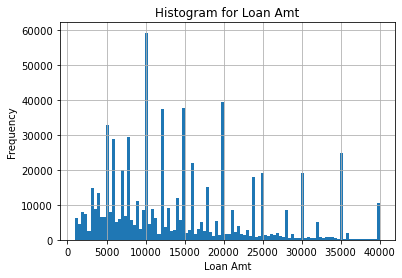

In [ ]:
# Histogram for Loan Amt
combined['loan_amnt']
plt.figure()
combined['loan_amnt'].hist(bins=100)
plt.title('Histogram for Loan Amt')
plt.xlabel("Loan Amt")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

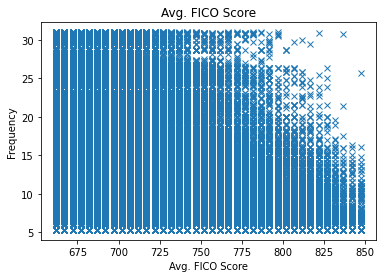

In [ ]:
# Avg FICO score.
combined['avg_fico'] = 0.5*(combined['fico_range_high'] + combined['fico_range_low'])
plt.figure()
plt.plot(combined['avg_fico'],combined['int_rate'],'x')
plt.title('Avg. FICO Score')
plt.xlabel("Avg. FICO Score")
plt.ylabel("Frequency")

Text(0, 0.5, 'Intrest Rate')

<Figure size 432x288 with 0 Axes>

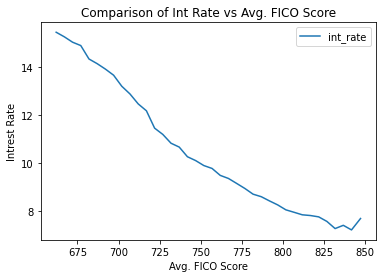

In [ ]:
#Comparison of Int Rate vs Avg. FICO Score

combined['int_rate'] = [float(str(val).split('%')[0]) for val in combined['int_rate']]
plt.figure()
resdf = combined[['int_rate','Avg_FICO_Score']]
mnvls = resdf.groupby('Avg_FICO_Score').mean()
mnvls.plot()
plt.title('Comparison of Int Rate vs Avg. FICO Score')
plt.xlabel("Avg. FICO Score")
plt.ylabel("Intrest Rate")

2) Using the sci-kit learn framework that we considered in class in the context of univariate logistic regression models, use the same sci-kit learn API to explore the predictive performance of other binary classi cation models. In particular, review the binary classi cation methods in the classification section of the scikit-learn website: https://scikit-learn.org/stable/ Compare model performance by overlaying their ROC curves and/or precision/recall curves.

In [ ]:
combined.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score,monthly_income,dti,avg_fico
98716,24000,24000,24000.0,60 months,18.99,622.45,D,D4,MORTGAGE,98000.0,...,20500,90253,2016,1,18018.96,75.0790,672.0,8166.666667,7.621837,672.0
98718,12000,12000,12000.0,60 months,19.53,314.80,D,D5,MORTGAGE,61500.0,...,35500,36030,2016,1,0.00,0.0000,742.0,5125.000000,6.142439,742.0
98722,5000,5000,5000.0,36 months,18.99,183.26,D,D4,MORTGAGE,156783.0,...,2300,45551,2016,1,0.00,0.0000,662.0,13065.250000,1.402652,662.0
98726,8400,8400,8400.0,36 months,11.99,278.97,C,C1,RENT,90750.0,...,24500,49956,2016,1,0.00,0.0000,667.0,7562.500000,3.688860,667.0
98740,20000,20000,20000.0,60 months,15.31,479.06,C,C5,RENT,55000.0,...,15800,10000,2016,1,15220.38,76.1019,667.0,4583.333333,10.452218,667.0


In [ ]:
combined['isdefault'] = np.nan
mask1 = combined['loan_status'] == 'Fully Paid'   # Paid back in full
mask2 = combined['loan_status'] == 'Charged Off'  # Defaulted
mask3 = combined['loan_status'] == 'Default'      # Defaulted

combined.loc[mask1,'isdefault'] = 0.
combined.loc[mask2,'isdefault'] = 1.
combined.loc[mask3,'isdefault'] = 1.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in combined.columns:
    if combined[i].dtype == object:
        combined[i] = le.fit_transform(combined[i])
        print("Completed change object type")

Completed change object type
Completed change object type
Completed change object type
Completed change object type
Completed change object type
Completed change object type
Completed change object type
Completed change object type
Completed change object type
Completed change object type
Completed change object type
Completed change object type


In [ ]:
combined.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
combined.dropna(inplace=True)
display(combined)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score,monthly_income,dti,avg_fico,isdefault
98716,24000,24000,24000.0,1,18.99,622.45,3,18,1,98000.0,...,90253,2016,1,18018.96,75.0790,672.0,8166.666667,7.621837,672.0,1.0
98718,12000,12000,12000.0,1,19.53,314.80,3,19,1,61500.0,...,36030,2016,1,0.00,0.0000,742.0,5125.000000,6.142439,742.0,0.0
98722,5000,5000,5000.0,0,18.99,183.26,3,18,1,156783.0,...,45551,2016,1,0.00,0.0000,662.0,13065.250000,1.402652,662.0,0.0
98726,8400,8400,8400.0,0,11.99,278.97,2,10,4,90750.0,...,49956,2016,1,0.00,0.0000,667.0,7562.500000,3.688860,667.0,0.0
98740,20000,20000,20000.0,1,15.31,479.06,2,14,4,55000.0,...,10000,2016,1,15220.38,76.1019,667.0,4583.333333,10.452218,667.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47145,3000,3000,3000.0,0,16.95,106.89,2,13,4,45000.0,...,3120,2019,9,0.00,0.0000,702.0,3750.000000,2.850400,702.0,0.0
48815,24000,24000,24000.0,0,18.62,875.15,3,15,1,26400.0,...,39433,2019,9,0.00,0.0000,702.0,2200.000000,39.779545,702.0,0.0
49787,19125,19125,19125.0,1,13.08,435.94,1,9,4,68000.0,...,12000,2019,9,0.00,0.0000,662.0,5666.666667,7.693059,662.0,0.0
52044,5000,5000,5000.0,0,8.19,157.13,0,3,3,30000.0,...,42088,2019,9,0.00,0.0000,682.0,2500.000000,6.285200,682.0,0.0


Random Forest Classification

In [ ]:
X = combined.drop(['isdefault'], axis = 1)
Y = combined['isdefault']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, shuffle = True)

X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score,monthly_income,dti,avg_fico
16485,24000,24000,24000.0,1,20.00,635.86,3,18,1,60000.0,...,15900,22824,2017,12,0.0,0.0,677.0,5000.000000,12.717200,677.0
99689,7000,7000,7000.0,0,6.08,213.21,0,1,3,90000.0,...,14000,87217,2018,1,0.0,0.0,787.0,7500.000000,2.842800,787.0
54762,12000,12000,12000.0,0,11.99,398.52,1,9,4,40000.0,...,17600,15594,2017,8,0.0,0.0,672.0,3333.333333,11.955600,672.0
86640,15000,15000,15000.0,0,8.99,476.93,1,5,1,450000.0,...,133200,115650,2016,7,0.0,0.0,692.0,37500.000000,1.271813,692.0
18600,25000,25000,25000.0,0,6.71,768.62,0,2,1,107000.0,...,46000,32740,2018,3,0.0,0.0,722.0,8916.666667,8.620037,722.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,35000,35000,35000.0,1,9.75,739.35,1,7,3,120000.0,...,140800,70874,2016,3,0.0,0.0,722.0,10000.000000,7.393500,722.0
17340,6000,6000,6000.0,0,9.75,192.90,1,7,4,35500.0,...,11600,54091,2016,6,0.0,0.0,697.0,2958.333333,6.520563,697.0
33737,5050,5050,5050.0,0,12.79,169.65,2,10,4,19760.0,...,8000,8400,2016,8,0.0,0.0,672.0,1646.666667,10.302632,672.0
79696,28000,28000,27750.0,0,5.32,843.22,0,0,4,400000.0,...,191790,0,2016,3,0.0,0.0,682.0,33333.333333,2.529660,682.0


In [ ]:
# Let's define the model (tree)
decision_tree = DecisionTreeClassifier(criterion="entropy")
# Let's tell the model what is the data
model = decision_tree.fit(X_train, Y_train)
print("The training accuracy rate for unpruned tree =", decision_tree.score(X_train, Y_train))

The training accuracy rate for unpruned tree = 1.0


NOTE:  After cleaning the data, we obtained an accuracy of 1, which is incorrect. We tried but were unable to find the problem. We kept running the models anyway.

In [ ]:
Unpruned_train_error = 1-decision_tree.score(X_train, Y_train)
print("The training error rate for unpruned tree =", Unpruned_train_error)

The training error rate for unpruned tree = 0.0


In [ ]:
nodes = model.tree_.node_count
print(nodes)

3


./images/tree.dot
./images/tree.png


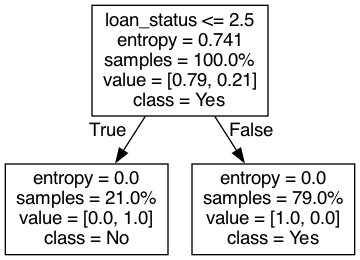

In [ ]:
import os
from IPython.display import Image
from sklearn.tree import export_graphviz

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    print(dot_name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    print(image_name)
    os.system("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    return Image(filename=image_name)

visualize_tree(decision_tree, X_train.columns, ["Yes", "No"])

In [ ]:
pred = decision_tree.predict(X_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
cm = pd.DataFrame(confusion_matrix(Y_test, pred).T,
                  index = ['No', 'Yes'],
                  columns = ['No', 'Yes'])
cm

,No,Yes
No,165425,0
Yes,0,44115


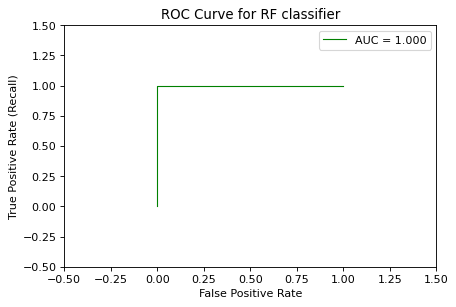

In [ ]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
probas = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=80)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

svc = SVC(random_state=42)
svc.fit(X_train, Y_train)

SVC(random_state=42)

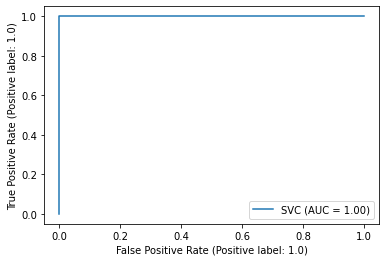

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, Y_test)
plt.show()

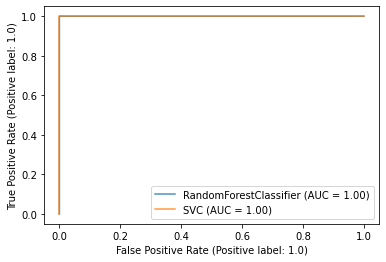

In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, Y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, Y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

KNN Cross Fold Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm
from sklearn.model_selection import cross_val_score

for i in range(1,11):
    decision_tree = DecisionTreeClassifier(max_depth=i, criterion="entropy")
# Let's tell the model what is the data
    model = decision_tree.fit(X_train, Y_train)
    decision_tree.score(X_train, Y_train)
    crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
    scores = cross_val_score(model, X_test, Y_test, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0


Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0
Folds: 10, MSE: 0.0, STD: 0.0


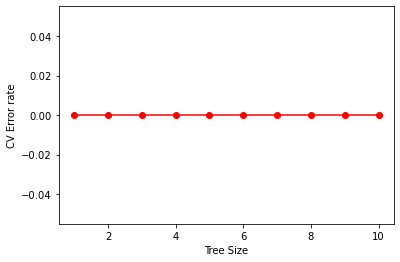

In [ ]:
plot1 = {}
for i in range(1,11):
    decision_tree = DecisionTreeClassifier(max_depth=i, criterion="entropy")
# Let's tell the model what is the data
    model = decision_tree.fit(X_train, Y_train)
    decision_tree.score(X_train, Y_train)
    crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
    scores = cross_val_score(model, X_test, Y_test, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
    plot1[i]=np.mean(np.abs(scores))

plt.plot(plot1.keys(), plot1.values(), color = 'red', marker='o')
plt.xlabel("Tree Size")
plt.ylabel("CV Error rate")
plt.show()

Since MSE and STD are zero, pruning is not required.

In [ ]:
#combined.to_excel(r'/Users/abhinavkulkarni/Library/CloudStorage/OneDrive-stevens.edu/Fall 2022/Financial Technology/combined_data_595.xlsx', index=False)